In [2]:
import torch

In [4]:
attn = torch.load("attn.pth")
print(attn.shape)

torch.Size([256, 4, 4])


In [28]:
attn[:1]

tensor([[[0.2275, 0.2603, 0.3218, 0.1905],
         [0.1855, 0.2477, 0.3308, 0.2360],
         [0.2596, 0.1642, 0.2987, 0.2774],
         [0.2671, 0.1882, 0.3106, 0.2341]]])

In [47]:
attn2 = attn[40:50,-1:,].squeeze(1)
attn2.shape

torch.Size([10, 4])

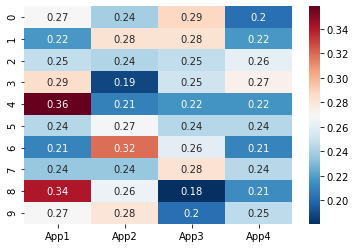

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

x_texts = ["App1", "App2", "App3", "App4"]

sns.heatmap(attn2, annot=True, cmap='RdBu_r', xticklabels=x_texts)
plt.savefig("SeqAttn.pdf",dpi=1500)

In [49]:
app_seq = torch.load("app_seq.pth")
app_seq.shape

torch.Size([256, 4])

In [50]:
app_seq[40:50]

tensor([[ 220,  176, 1065,  645],
        [   6,  315,  315,    6],
        [ 438,    0,  125,  187],
        [ 177,  271,    3,  104],
        [ 152,    6,   28,   28],
        [  30,   45,   30,   30],
        [   4,  488,  212,    4],
        [   3,    1,   57,  324],
        [  36,  645,   26,    1],
        [   1,  324,   40,  220]])

36 645 26 1

'Social\_Networking'
'wechat','linkedin','weibo'

'Games'

'News'

'Social\_Networking'
'wechat','linkedin','weibo'

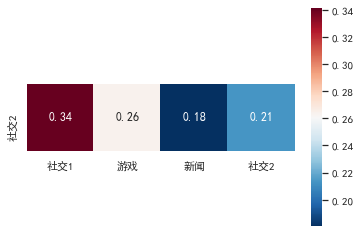

In [81]:
x_texts = ["社交1", "游戏", "新闻", "社交2"]
#plt.figure(figsize=(8,1))
sns.set(font='simhei')
sns.heatmap(attn2[-2:-1], annot=True, cmap='RdBu_r', xticklabels=x_texts, square=True, yticklabels=["社交2"])
plt.savefig("SeqAttn_case.pdf",dpi=1500)

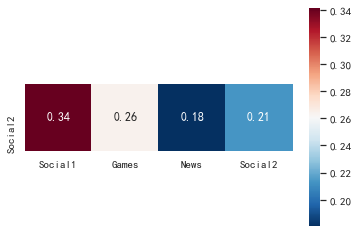

In [265]:
y_texts = ["Social1", "Games", "News", "Social2"]
#plt.figure(figsize=(8,1))
sns.heatmap(attn2[-2:-1], annot=True, cmap='RdBu_r', xticklabels=y_texts, square=True, yticklabels=["Social2"])
plt.savefig("SeqAttn_case_eng.pdf",dpi=1500)

In [82]:
import numpy as np
from sklearn.manifold import TSNE

hg = torch.load("bip.pth")
hg.shape

torch.Size([256, 5, 100])

In [244]:
batch = 50

In [245]:
user = hg[:batch, :1, :]
app = hg[:batch, 1:2, :]
print(user.shape)
print(app.shape)

torch.Size([50, 1, 100])
torch.Size([50, 1, 100])


In [246]:
user = user.squeeze(1)
user.shape

torch.Size([50, 100])

In [247]:
app = app.squeeze(1)
app.shape

torch.Size([50, 100])

In [248]:
data = torch.cat([user, app], 0)
data.shape

torch.Size([100, 100])

In [249]:
import pandas as pd 
label1 = ['blue']*batch
label2 = ['red']*batch
label = label1 + label2
len(label)

100

In [250]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(data)

In [251]:
result.shape

(100, 2)

In [252]:
def plot_embedding(data, label):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(batch-1):
        u = plt.scatter(data[i, 0], data[i, 1], c=label[i])
    u2 = plt.scatter(data[batch-1, 0], data[batch-1, 1], c=label[batch-1], marker='x')
    for i in range(batch-1):
        a = plt.scatter(data[batch+i, 0], data[batch+i, 1], c=label[batch+i])
    a2 = plt.scatter(data[2*batch-1, 0], data[2*batch-1, 1], c=label[2*batch-1], marker='x')
    plt.xticks([])
    plt.yticks([])
    plt.legend((u, a), ('user', 'app'), loc='best')
    return fig

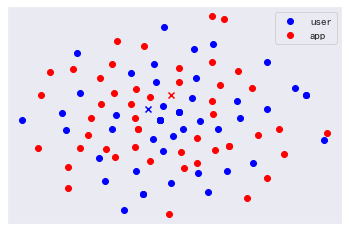

In [255]:
fig = plot_embedding(result, label)
plt.savefig("BipVisual.pdf",dpi=1500)
plt.show(fig)

In [257]:
user_case = torch.load("user.pth")
user_case[batch-1]

tensor([698])

In [258]:
app_seq[batch-1]

tensor([  1, 324,  40, 220])

698号用户与1号App的可视化

### 超边案例分析

In [309]:
user_p = torch.load("user_p.pth").squeeze(1)
time_p = torch.load("time_p.pth").squeeze(1)
loc_p = torch.load("loc_p.pth").squeeze(1)
app_p = torch.load("app_p.pth")

In [310]:
app_p = app_p[:, 0, :].squeeze(1)
app_p.shape

torch.Size([256, 100])

In [311]:
print(user_p.shape)
print(time_p.shape)
print(loc_p.shape)
print(app_p.shape)

torch.Size([256, 100])
torch.Size([256, 100])
torch.Size([256, 100])
torch.Size([256, 100])


In [274]:
data = torch.cat()

torch.Size([256, 100])

In [276]:
u_p = tsne.fit_transform(user_p)
t_p = tsne.fit_transform(time_p)
l_p = tsne.fit_transform(loc_p)
a_p = tsne.fit_transform(app_p)

In [291]:
u_p_min, u_p_max = np.min(u_p, 0), np.max(u_p, 0)
u_p = (u_p - u_p_min) / (u_p_max - u_p_min)

In [307]:
t_p_min, t_p_max = np.min(t_p, 0), np.max(t_p, 0)
t_p = (t_p - t_p_min) / (t_p_max - t_p_min)

In [312]:
l_p_min, l_p_max = np.min(l_p, 0), np.max(l_p, 0)
l_p = (l_p - l_p_min) / (l_p_max - l_p_min)

In [314]:
a_p_min, a_p_max = np.min(a_p, 0), np.max(a_p, 0)
a_p = (a_p - a_p_min) / (a_p_max - a_p_min)

In [292]:
u_p.shape

(256, 2)

In [293]:
u_p[0]

array([0.1071309, 0.8363133], dtype=float32)

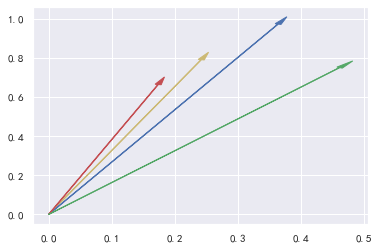

In [354]:
num1 = 13
ax = plt.axes()
ax.arrow(0, 0, u_p[num1][0], u_p[num1][1], head_width=0.01, head_length=0.04, fc='y', ec='y')
ax.arrow(0, 0, t_p[num1][0], t_p[num1][1], head_width=0.01, head_length=0.04, fc='b', ec='b')
ax.arrow(0, 0, l_p[num1][0], l_p[num1][1], head_width=0.01, head_length=0.04, fc='r', ec='r')
ax.arrow(0, 0, a_p[num1][0], a_p[num1][1], head_width=0.01, head_length=0.04, fc='g', ec='g')
plt.show()

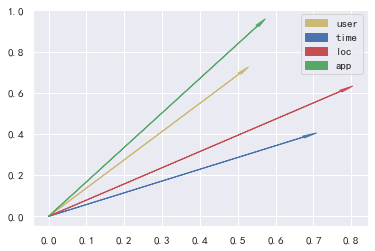

In [364]:
ax = plt.axes()
x1 = ax.arrow(0, 0, u_p[7][0], u_p[7][1], head_width=0.01, head_length=0.04, fc='y', ec='y')
x2 = ax.arrow(0, 0, t_p[7][0], t_p[7][1], head_width=0.01, head_length=0.04, fc='b', ec='b')
x3 = ax.arrow(0, 0, l_p[7][0], l_p[7][1], head_width=0.01, head_length=0.04, fc='r', ec='r')
x4 = ax.arrow(0, 0, a_p[7][0], a_p[7][1], head_width=0.01, head_length=0.04, fc='g', ec='g')
plt.legend((x1, x2, x3, x4), ('user', 'time', 'loc', 'app'), loc='best')
plt.savefig("PosHyperVisual.pdf",dpi=1500)
plt.show()

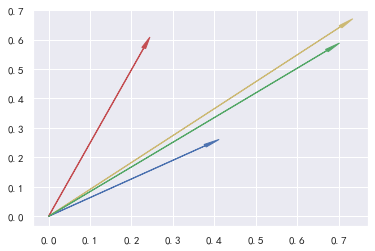

In [324]:
ax = plt.axes()
ax.arrow(0, 0, u_p[3][0], u_p[3][1], head_width=0.01, head_length=0.04, fc='y', ec='y')
ax.arrow(0, 0, t_p[3][0], t_p[3][1], head_width=0.01, head_length=0.04, fc='b', ec='b')
ax.arrow(0, 0, l_p[3][0], l_p[3][1], head_width=0.01, head_length=0.04, fc='r', ec='r')
ax.arrow(0, 0, a_p[3][0], a_p[3][1], head_width=0.01, head_length=0.04, fc='g', ec='g')
plt.show()

### 负采样

In [317]:
user_n = torch.load("user_n.pth").squeeze(1)
time_n = torch.load("time_n.pth").squeeze(1)
loc_n = torch.load("loc_n.pth").squeeze(1)
app_n = torch.load("app_n.pth")

In [318]:
app_n = app_n[:, 0, :].squeeze(1)
app_n.shape

torch.Size([256, 100])

In [319]:
u_n = tsne.fit_transform(user_n)
t_n = tsne.fit_transform(time_n)
l_n = tsne.fit_transform(loc_n)
a_n = tsne.fit_transform(app_n)

In [320]:
u_n_min, u_n_max = np.min(u_n, 0), np.max(u_n, 0)
u_n = (u_n - u_n_min) / (u_n_max - u_n_min)
t_n_min, t_n_max = np.min(t_n, 0), np.max(t_n, 0)
t_n = (t_n - t_n_min) / (t_n_max - t_n_min)
l_n_min, l_n_max = np.min(l_n, 0), np.max(l_n, 0)
l_n = (l_n - l_n_min) / (l_n_max - l_n_min)
a_n_min, a_n_max = np.min(a_n, 0), np.max(a_n, 0)
a_n = (a_n - a_n_min) / (a_n_max - a_n_min)

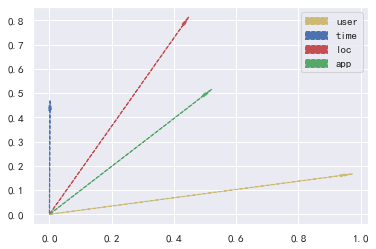

In [365]:
ax = plt.axes()
y1 = ax.arrow(0, 0, u_n[3][0], u_n[3][1], head_width=0.01, head_length=0.04, fc='y', ec='y', linestyle='--')
y2 = ax.arrow(0, 0, t_n[3][0], t_n[3][1], head_width=0.01, head_length=0.04, fc='b', ec='b', linestyle='--')
y3 = ax.arrow(0, 0, l_n[3][0], l_n[3][1], head_width=0.01, head_length=0.04, fc='r', ec='r', linestyle='--')
y4 = ax.arrow(0, 0, a_n[3][0], a_n[3][1], head_width=0.01, head_length=0.04, fc='g', ec='g', linestyle='--')
plt.legend((y1, y2, y3, y4), ('user', 'time', 'loc', 'app'), loc='best')
plt.savefig("NegHyperVisual.pdf",dpi=1500)
plt.show()

In [347]:
num = 17

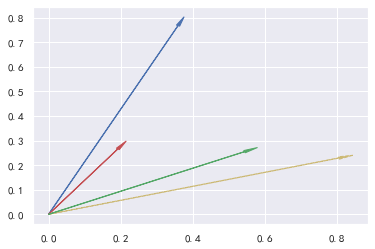

In [357]:
ax = plt.axes()
ax.arrow(0, 0, u_n[num][0], u_n[num][1], head_width=0.01, head_length=0.04, fc='y', ec='y')
ax.arrow(0, 0, t_n[num][0], t_n[num][1], head_width=0.01, head_length=0.04, fc='b', ec='b')
ax.arrow(0, 0, l_n[num][0], l_n[num][1], head_width=0.01, head_length=0.04, fc='r', ec='r')
ax.arrow(0, 0, a_n[num][0], a_n[num][1], head_width=0.01, head_length=0.04, fc='g', ec='g')
plt.show()

In [367]:
user = torch.load("user.pth")
time = torch.load("time.pth")
loc = torch.load("loc.pth")
app_seq = torch.load("app_seq.pth")

In [368]:
print(user[7])
print(time[7])
print(loc[7])
print(app_seq[7])

tensor([569])
tensor([37])
tensor([4117])
tensor([  7, 220,  30,  30])


569号用户在时间箱ID为37（周二13点）时，且在位置ID为4117上（商务和生活服务类poi场所），使用了7号App（游戏类）